## TODO:
- Creo que el problema ahora es cuando hace el augment. Debería haber un maximo augment y que no choque con una cardinalidad que ya toco (osea, la linea no puede estar entre la misma card).
- Habría que finetunear al maximo el hough para que ande bien siempre y tolis. Avanzariamos con el OCR ya

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import sys
sys.path.append("../src/")
from line_detection.hough import *

In [2]:
import os
import cv2
import numpy as np
import pandas as pd
import math
import random
from PIL import Image
from IPython.display import display

## En vez de puntos, pruebo con imagenes

In [3]:
OFFSET_TABLAS = 5
BASE_FOLDER = "../data/imagenes_diagramas/"
IMGS = sorted([os.path.join(BASE_FOLDER,img_path) for img_path in os.listdir(BASE_FOLDER)])

/home/nacho/TFI-Cazcarra/venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


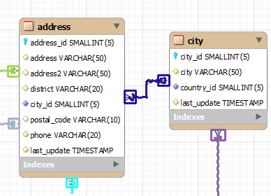

/home/nacho/TFI-Cazcarra/venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


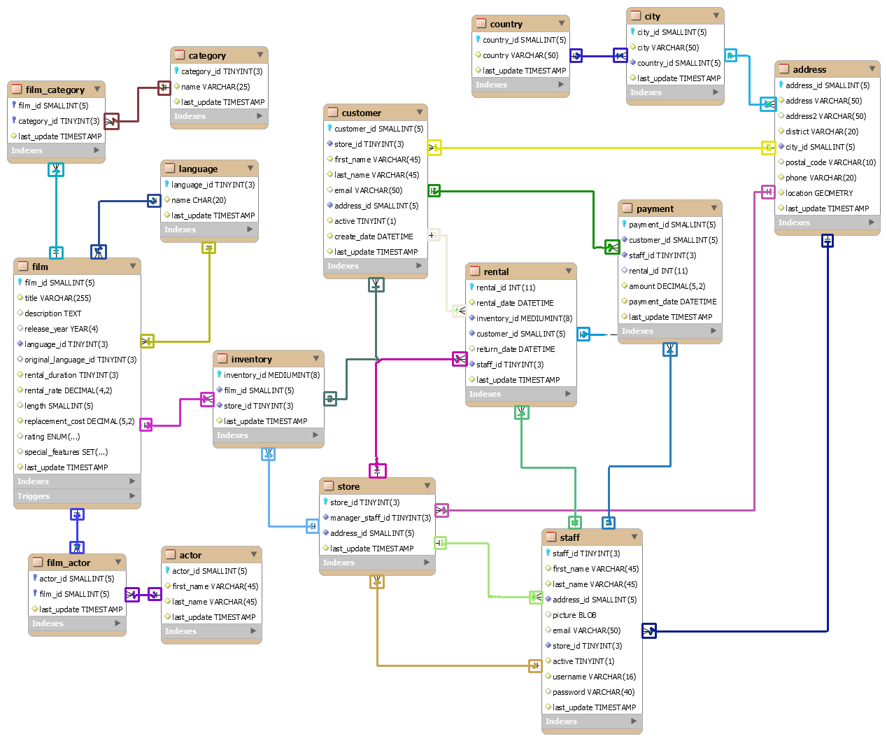

/home/nacho/TFI-Cazcarra/venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Increasing offset to 2
Increasing offset to 4
Increasing offset to 6
Increasing offset to 8
Increasing offset to 10
Increasing offset to 2
Increasing offset to 2
Increasing offset to 4
Increasing offset to 6
Increasing offset to 8
Increasing offset to 10
Increasing offset to 12
Increasing offset to 14
Increasing offset to 16
Increasing offset to 18
Increasing offset to 20
Increasing offset to 22
Increasing offset to 24
Increasing offset to 26


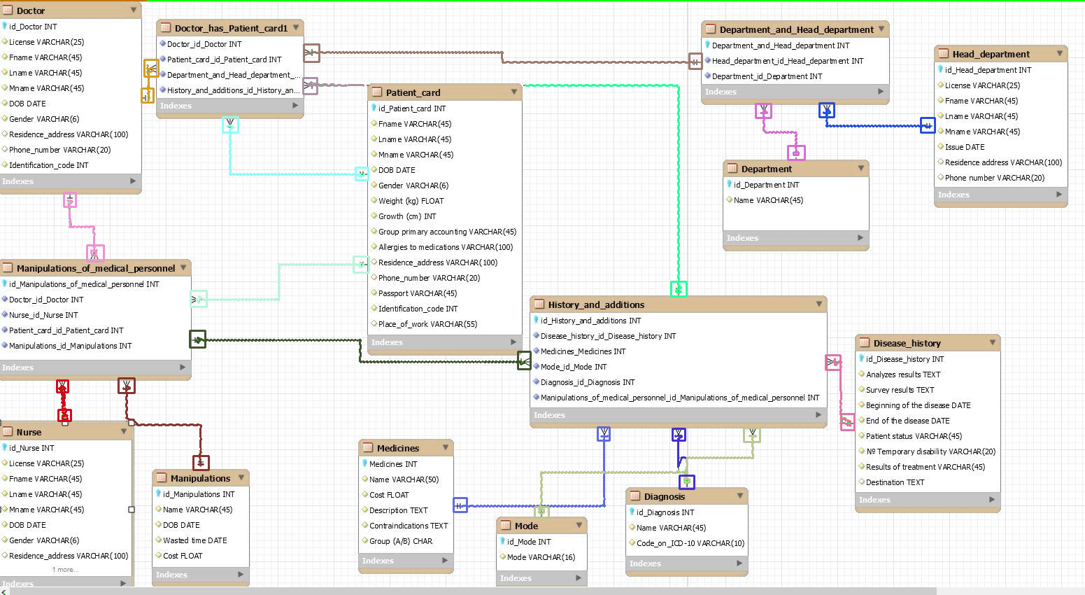

/home/nacho/TFI-Cazcarra/venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


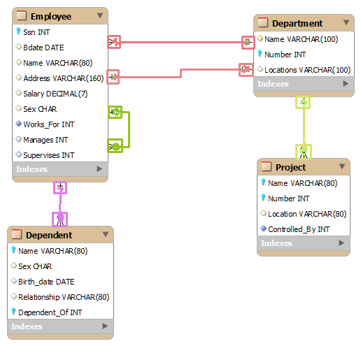

/home/nacho/TFI-Cazcarra/venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Increasing offset to 2
Increasing offset to 4


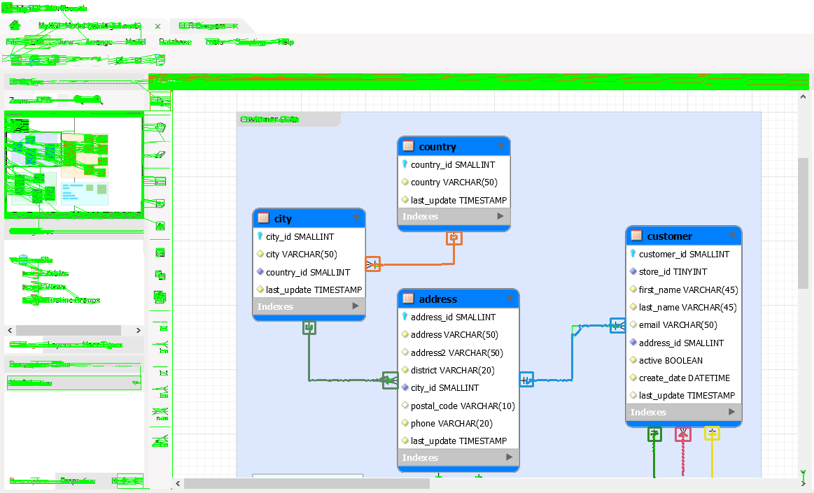

/home/nacho/TFI-Cazcarra/venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


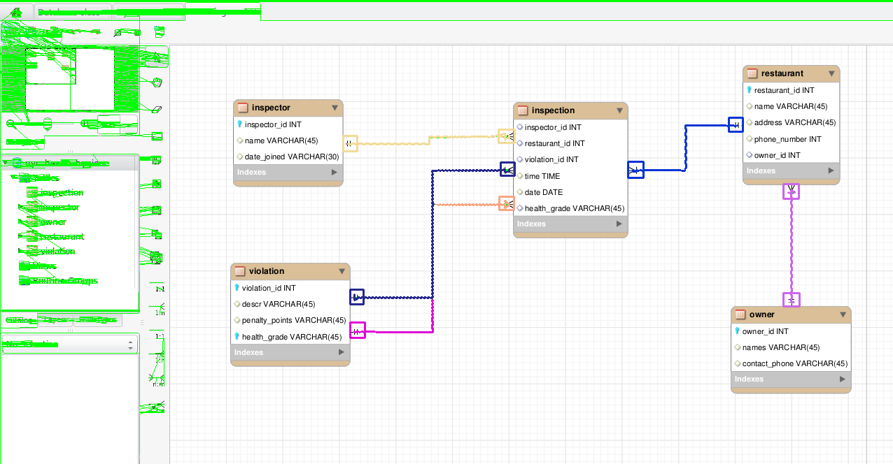

/home/nacho/TFI-Cazcarra/venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Increasing offset to 2
Increasing offset to 4
Increasing offset to 6
Increasing offset to 8
Increasing offset to 10
Increasing offset to 12
Increasing offset to 14
Increasing offset to 16
Increasing offset to 18
Increasing offset to 20
Increasing offset to 22
Increasing offset to 24
Increasing offset to 26
Increasing offset to 28
Increasing offset to 30
Increasing offset to 32
Increasing offset to 34
Increasing offset to 36
Increasing offset to 38
Increasing offset to 40
Increasing offset to 42
Increasing offset to 44
Increasing offset to 46
Increasing offset to 48
Increasing offset to 50
Increasing offset to 52
Increasing offset to 54
Increasing offset to 2
Increasing offset to 4
Increasing offset to 6
Increasing offset to 8
Increasing offset to 10
Increasing offset to 12
Increasing offset to 14
Increasing offset to 16
Increasing offset to 18
Increasing offset to 20
Increasing offset to 22
Increasing offset to 24
Increasing offset to 26
Increasing offset to 28
Increasing offset to 30


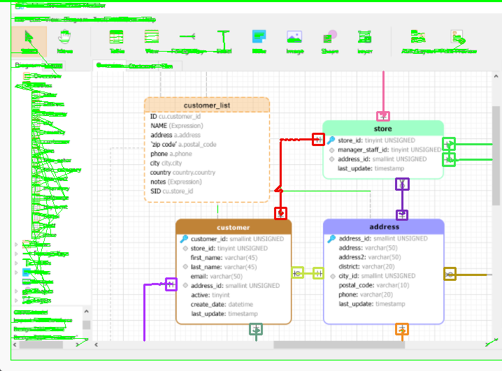

/home/nacho/TFI-Cazcarra/venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


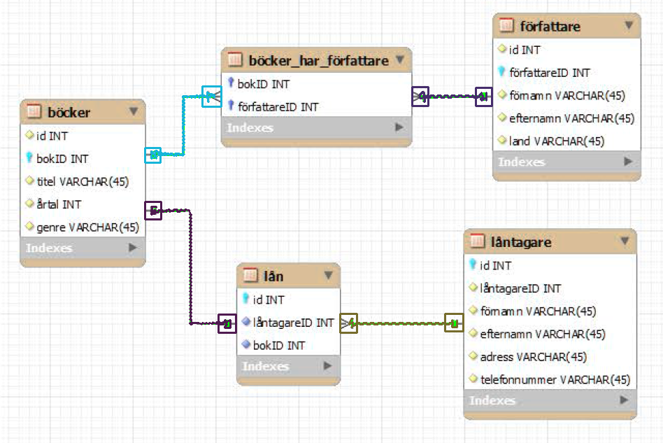

/home/nacho/TFI-Cazcarra/venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


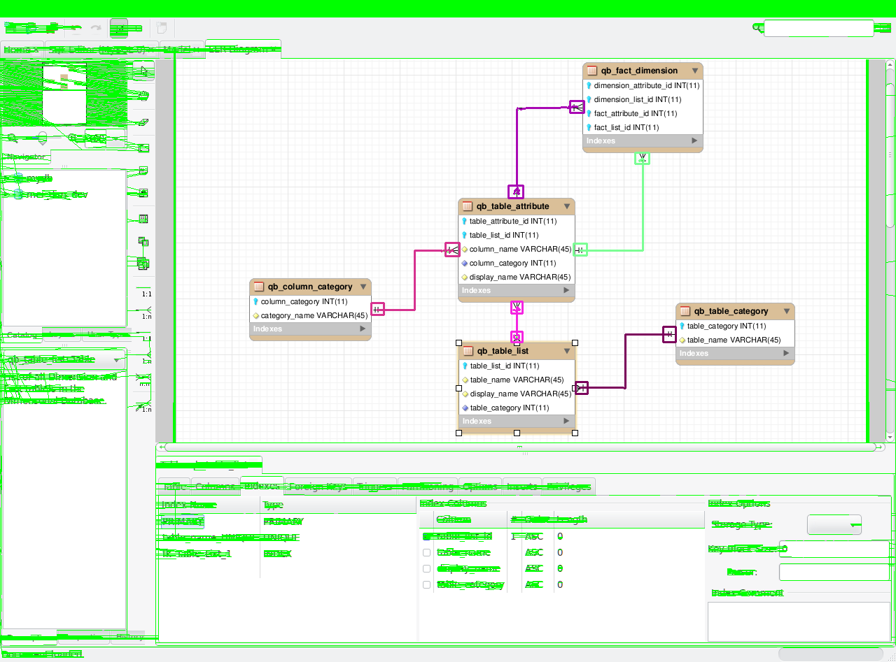

/home/nacho/TFI-Cazcarra/venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


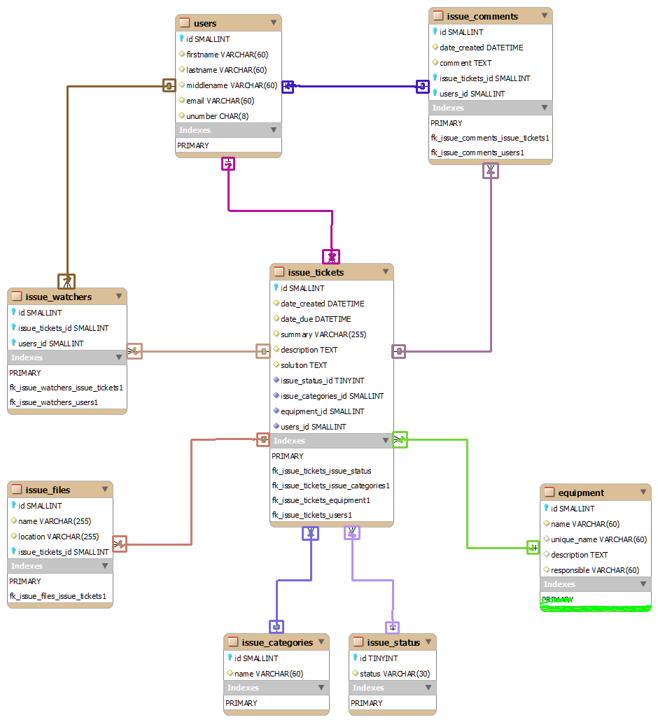

Increasing offset to 2
Increasing offset to 2
Increasing offset to 4
Increasing offset to 6
Increasing offset to 8
Increasing offset to 10
Increasing offset to 12


/home/nacho/TFI-Cazcarra/venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


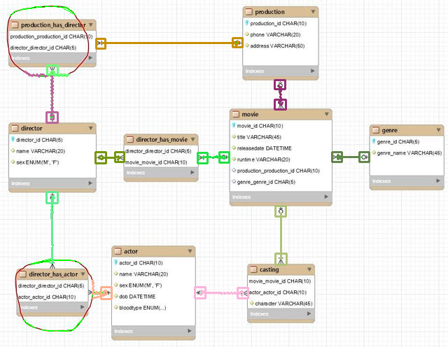

/home/nacho/TFI-Cazcarra/venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


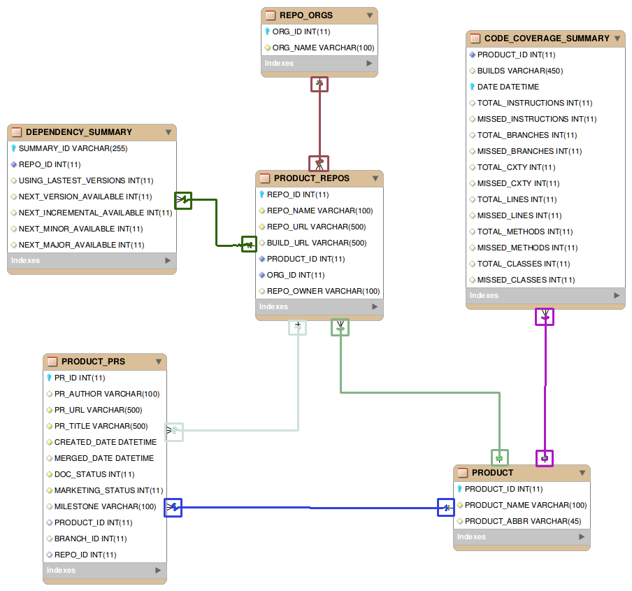

/home/nacho/TFI-Cazcarra/venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Increasing offset to 2
Increasing offset to 2
Increasing offset to 4
Increasing offset to 6
Increasing offset to 8
Increasing offset to 10
Increasing offset to 12
Increasing offset to 14
Increasing offset to 16
Increasing offset to 18
Increasing offset to 2
Increasing offset to 4
Increasing offset to 6
Increasing offset to 8
Increasing offset to 10
Increasing offset to 12
Increasing offset to 14
Increasing offset to 2
Increasing offset to 4
Increasing offset to 6
Increasing offset to 8
Increasing offset to 10
Increasing offset to 12
Increasing offset to 14
Increasing offset to 2
Increasing offset to 4
Increasing offset to 6
Increasing offset to 8
Increasing offset to 2
Increasing offset to 4
Increasing offset to 6
Increasing offset to 8
Increasing offset to 10
Increasing offset to 2
Increasing offset to 4
Increasing offset to 6
Increasing offset to 8
Increasing offset to 10
Increasing offset to 12
Increasing offset to 14
Increasing offset to 2
Increasing offset to 4
Increasing offset t

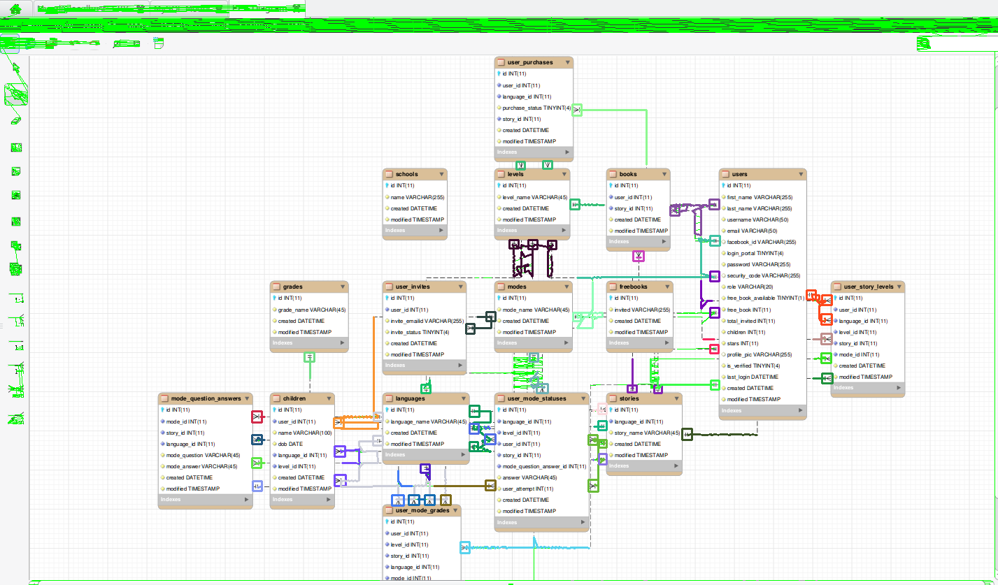

/home/nacho/TFI-Cazcarra/venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Increasing offset to 2
Increasing offset to 4
Increasing offset to 6
Increasing offset to 8
Increasing offset to 10
Increasing offset to 12
Increasing offset to 14
Increasing offset to 16
Increasing offset to 18
Increasing offset to 20
Increasing offset to 22
Increasing offset to 24
Increasing offset to 26
Increasing offset to 28
Increasing offset to 30
Increasing offset to 32
Increasing offset to 34
Increasing offset to 36
Increasing offset to 38
Increasing offset to 40
Increasing offset to 42
Increasing offset to 44
Increasing offset to 46
Increasing offset to 48
Increasing offset to 50
Increasing offset to 52
Increasing offset to 54
Increasing offset to 56
Increasing offset to 58
Increasing offset to 2
Increasing offset to 4
Increasing offset to 6
Increasing offset to 8
Increasing offset to 10
Increasing offset to 12
Increasing offset to 14
Increasing offset to 16
Increasing offset to 18
Increasing offset to 20
Increasing offset to 22
Increasing offset to 24
Increasing offset to 26


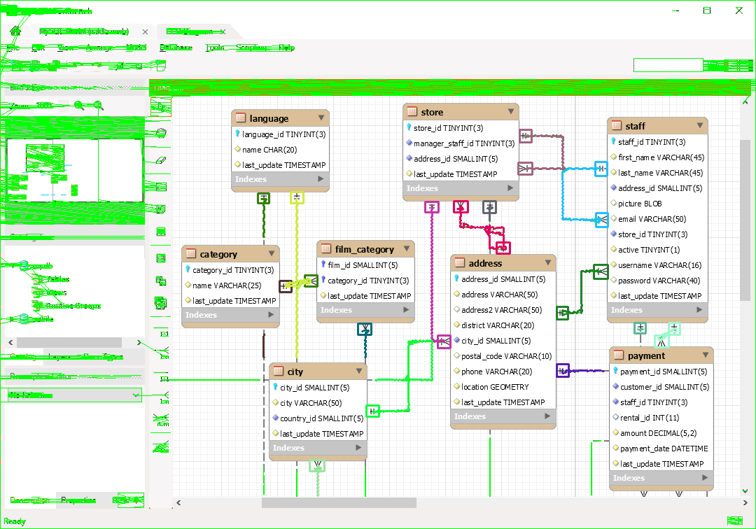

/home/nacho/TFI-Cazcarra/venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Increasing offset to 2
Increasing offset to 4
Increasing offset to 6
Increasing offset to 8
Increasing offset to 10
Increasing offset to 12
Increasing offset to 2
Increasing offset to 4
Increasing offset to 6
Increasing offset to 8
Increasing offset to 10
Increasing offset to 12
Increasing offset to 2
Increasing offset to 4
Increasing offset to 6
Increasing offset to 8
Increasing offset to 10
Increasing offset to 12
Increasing offset to 14
Increasing offset to 2
Increasing offset to 4
Increasing offset to 6
Increasing offset to 8


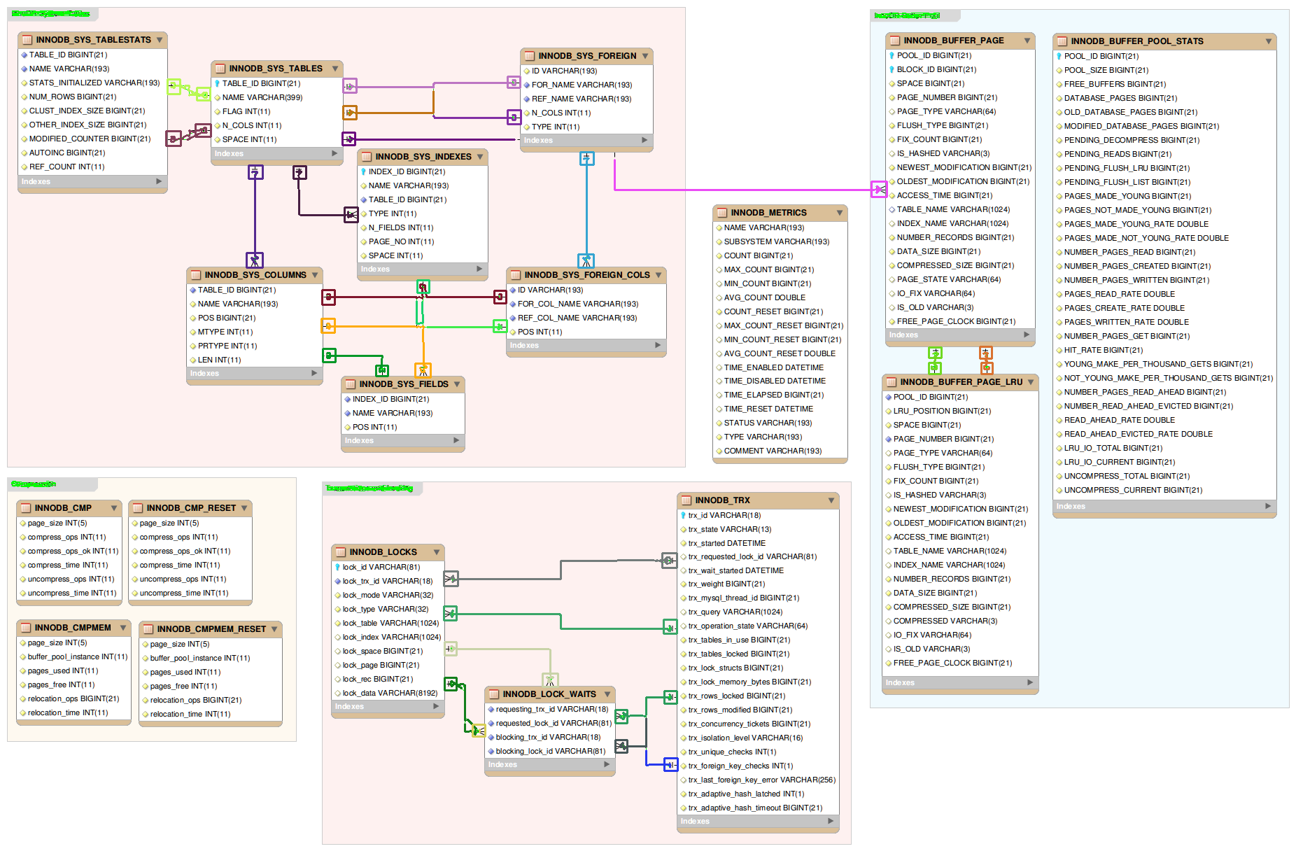

/home/nacho/TFI-Cazcarra/venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


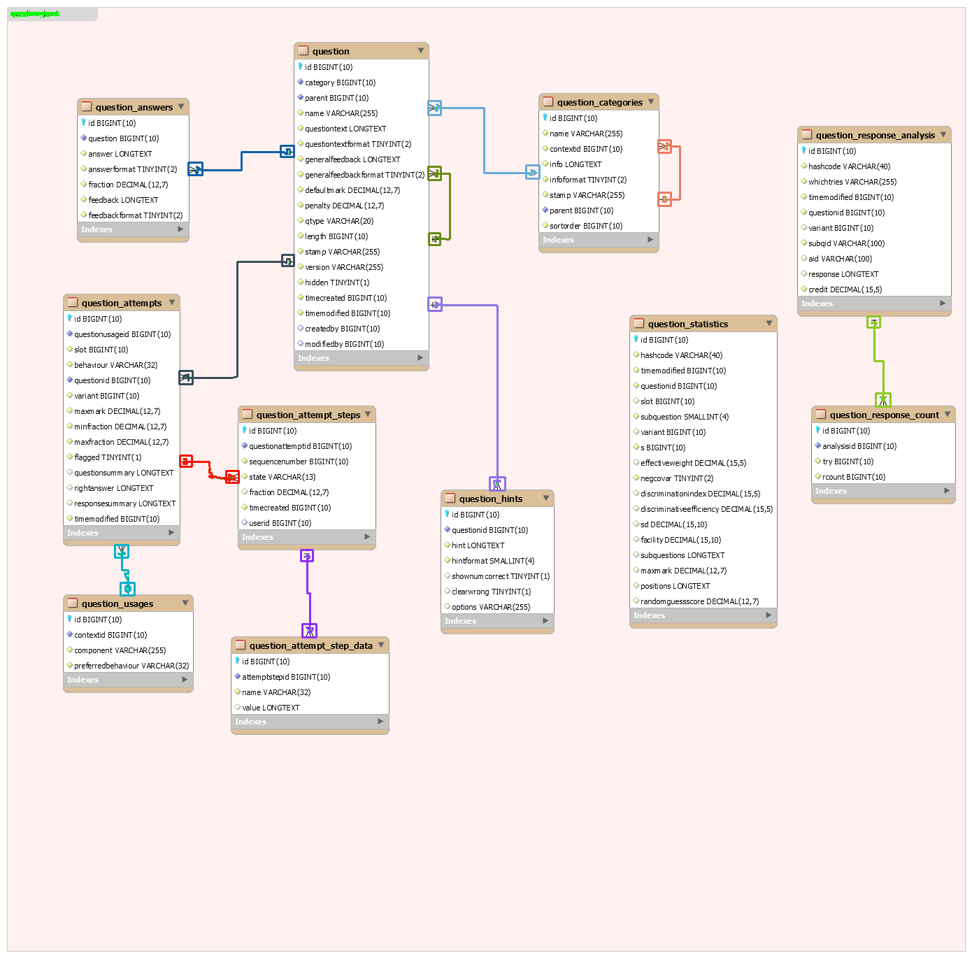

/home/nacho/TFI-Cazcarra/venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


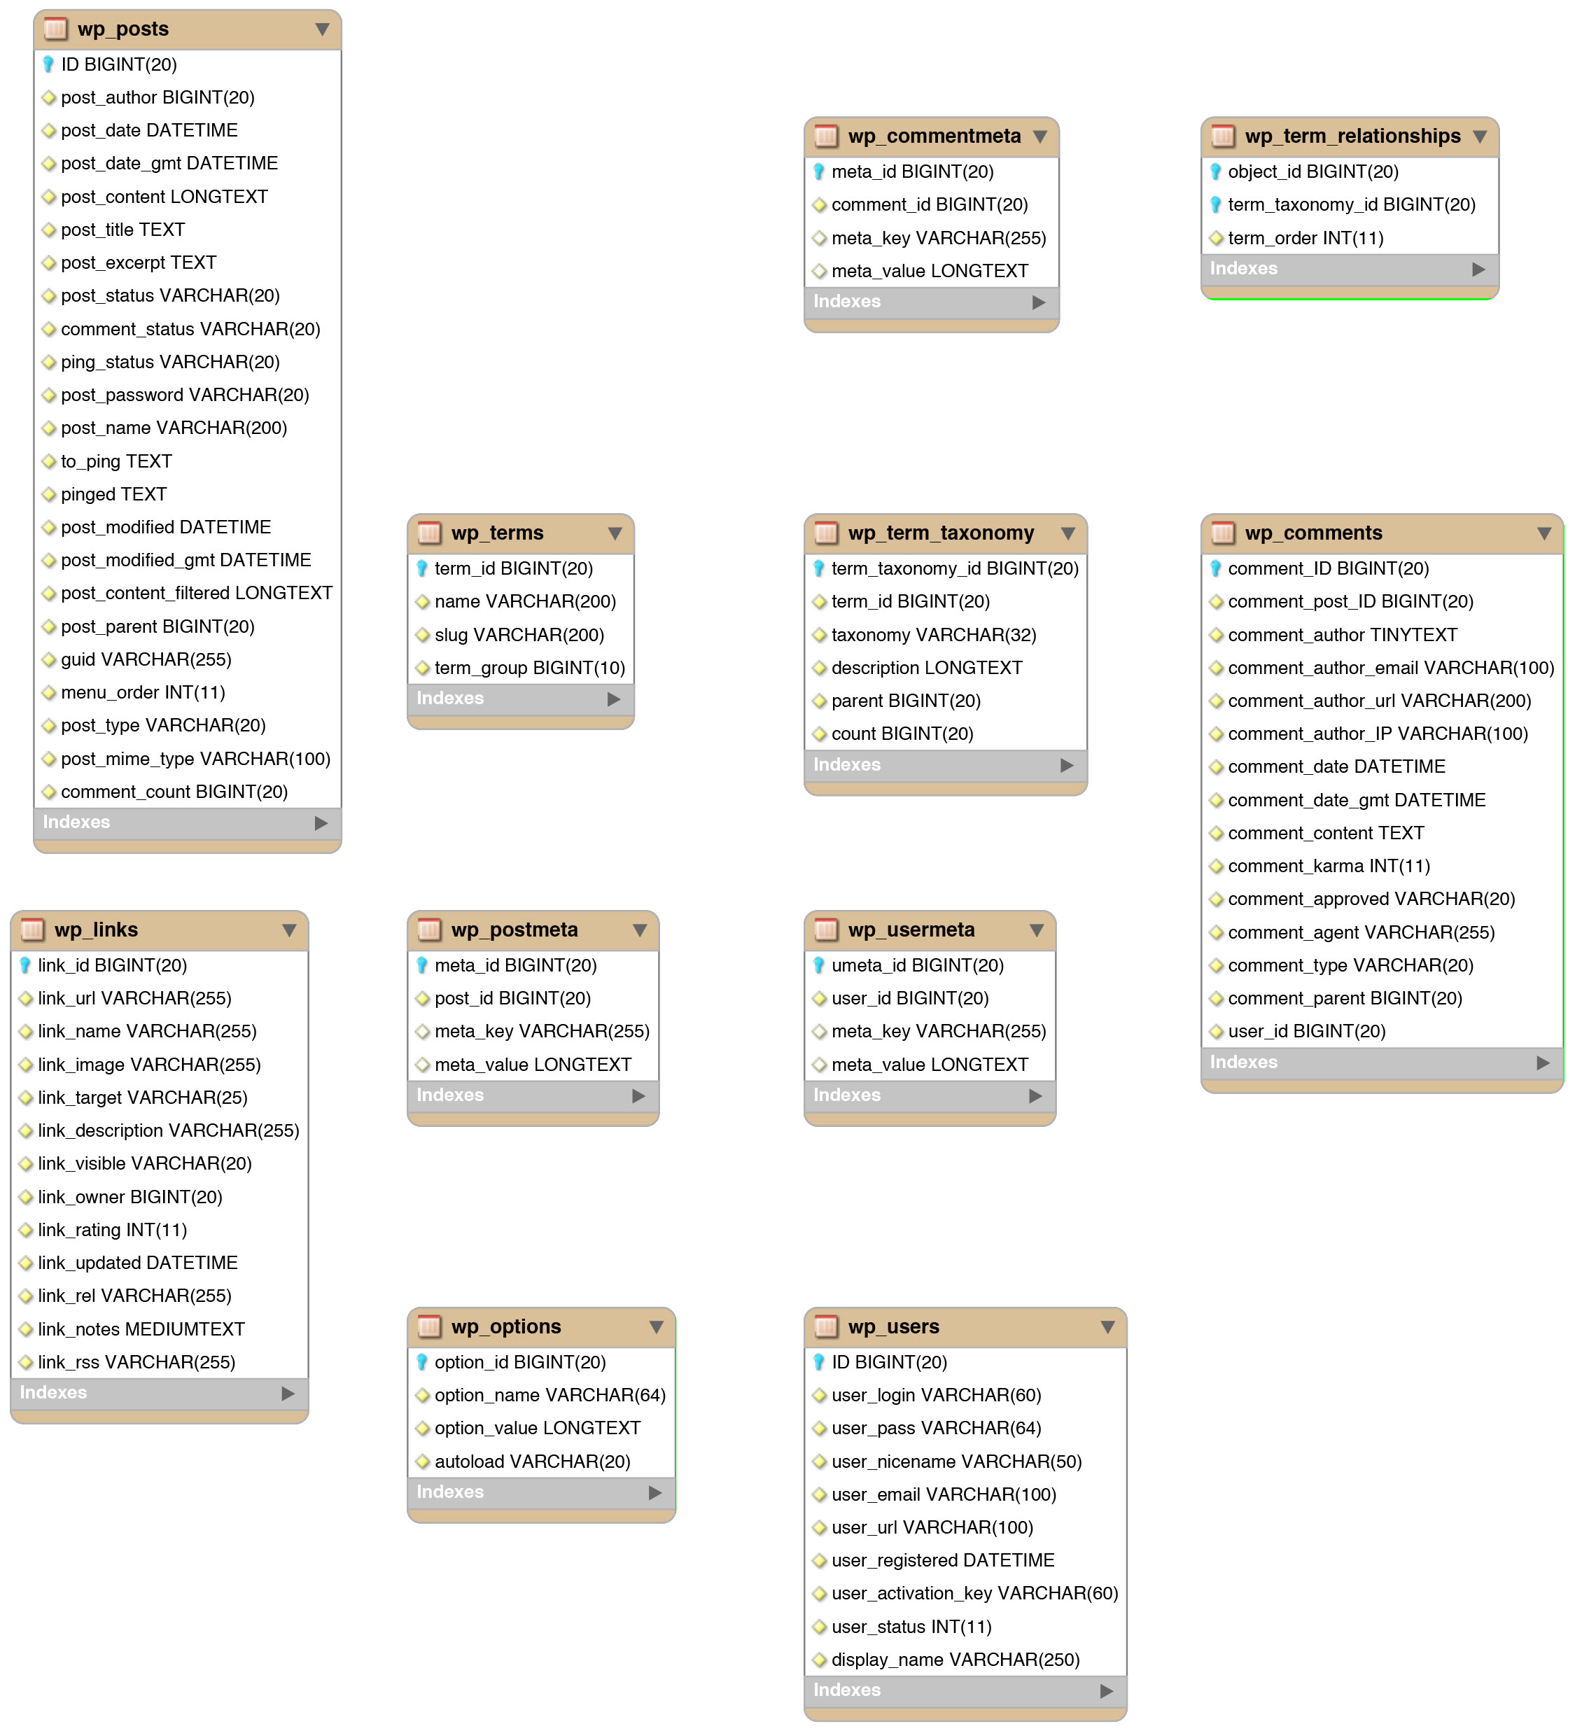

/home/nacho/TFI-Cazcarra/venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


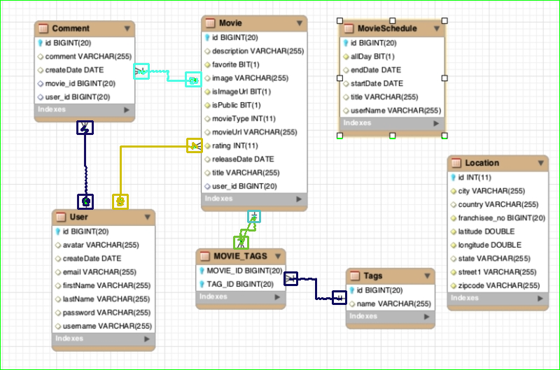

/home/nacho/TFI-Cazcarra/venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


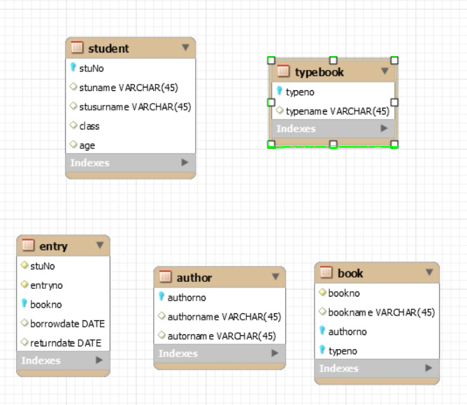

/home/nacho/TFI-Cazcarra/venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


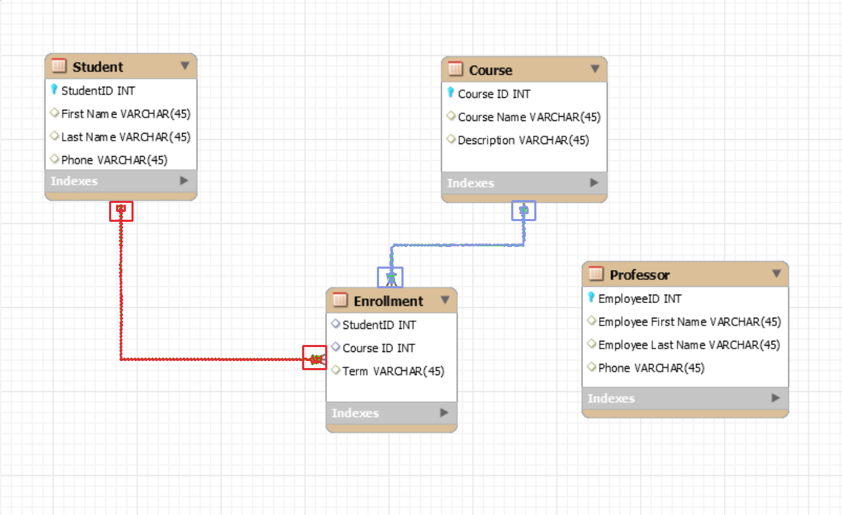

/home/nacho/TFI-Cazcarra/venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


KeyboardInterrupt: 

In [4]:
for img_path in IMGS[2:]:
    img_basename = os.path.basename(img_path)
    tablas, cardinalidades = get_tablas(img_basename)
    #Agrandamos un toque las cajas
    offset = np.array([-OFFSET_TABLAS, -OFFSET_TABLAS, OFFSET_TABLAS, OFFSET_TABLAS]).reshape(1,4)
    tablas = np.sum([tablas, offset])

    #No le paso las cardinalidades.
    img, all_lines = apply_hough(img_path, tablas, [])

    all_points = lines_to_points(all_lines)
    plotted_points = plot_points(img, all_points)
    lines = hough_detecting(all_points)
    plotted_lines = plot_lines(img, lines)

    factor = 0.7
    final_results = unify_cardinalidades(img, lines, cardinalidades)
    final_results = final_results.resize((int(d*factor) for d in final_results.size))

    display(final_results)

## Chequeo de a uno solo para debuggear

In [ ]:
img_path = "/home/nacho/TFI-Cazcarra/data/imagenes_diagramas/ERDiagramsMySQL-20.png"
img_basename = os.path.basename(img_path)
tablas, cardinalidades = get_tablas(img_basename)
#Agrandamos un toque las cajas
offset = np.array([-OFFSET_TABLAS, -OFFSET_TABLAS, OFFSET_TABLAS, OFFSET_TABLAS]).reshape(1,4)
tablas = np.sum([tablas, offset])

#No le paso las cardinalidades.
img, all_lines = apply_hough(img_path, tablas, [])

all_points = lines_to_points(all_lines, max_dst_per_points=5)
plotted_points = plot_points(img, all_points)
lines = hough_detecting(all_points, dst_threhold=30)
plotted_lines = plot_lines(img, lines)

factor = 0.6
final_results = unify_cardinalidades(img, lines, cardinalidades)
final_results = final_results.resize((int(d*factor) for d in final_results.size))

display(final_results)

In [ ]:
inputImage = cv2.imread(img_path)
inputImageGray = cv2.cvtColor(inputImage, cv2.COLOR_BGR2GRAY)

#edges = cv2.Canny(inputImageGray, 150, 200, apertureSize = 3)
ret, thresh = cv2.threshold(inputImageGray, 125, 255, cv2.THRESH_BINARY_INV)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

edges = np.zeros(inputImage.shape, dtype = np.uint8) # Creamos una imagen en negro
edges = cv2.drawContours(edges, contours, -1, (255, 255, 255), -1)
edges = cv2.cvtColor(edges, cv2.COLOR_BGR2GRAY)

minLineLength = 500
maxLineGap = -1

for t in tablas:
    edges = cv2.rectangle(edges, t[:2], t[2:], color=(0,0,0), thickness=-1)
    
display(Image.fromarray(edges))

## Para plotear dos imagenes juntas. Ignorar

In [ ]:
i1 = cv2.imread("../data/imagenes_extra/recta_a.png")
i2 = cv2.imread("../data/imagenes_extra/recta_B.png")

%matplotlib inline

# figure size in inches optional
rcParams['figure.figsize'] = 8, 8

# display images
fig, ax = plt.subplots(1,2)
ax[0].imshow(i1)
ax[1].imshow(cv2.cvtColor(i2, cv2.COLOR_BGR2RGB))

ax[0].set_xticks([])
ax[0].set_yticks([])
ax[1].set_xticks([])
ax[1].set_yticks([])

plt.show()